In [8]:
from matplotlib import pyplot as plt
import cv2
import mss
import numpy as np



def display_image(image):
    plt.figure(figsize=(15, 15))
    # Определяем количество цветовых каналов
    # Если 3, то это цветное изображение, переводим в RGB
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
    # Иначе отрисовываем в оттенках серого
    else:
        plt.imshow(image, cmap='gray')
    plt.show()
    
import torch
import cv2
from ultralytics import YOLO
import datetime
from time import sleep

output_folder = r'./output'

model = YOLO('yolov8l.pt')

print('Is CUDA available: ', torch.cuda.is_available())
print('CUDA version: ', torch.version.cuda)

cap = cv2.VideoCapture(0)

k_size = 1.0
r_size = 1.0
# fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * k_size)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * k_size)

# total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# fourcc = cv2.VideoWriter_fourcc(*'H264')  # Be sure to use lower case
# out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))


Is CUDA available:  True
CUDA version:  12.1


In [9]:
frame = None

ret, _frame = cap.read()

print(f'{ret=}')

if _frame is not None:
    print('Frame shape:', _frame.shape)

if ret:

    render = cv2.resize(_frame.copy(), (width, height), interpolation=cv2.INTER_AREA)

    results = model.predict(_frame, verbose=True, device='cuda')

    bboxes = []

    for predictions in results:
        if predictions is None:
            continue
        if predictions.boxes is None or predictions.masks is None:
            continue

        for bbox, masks in zip(predictions.boxes, predictions.masks):
            ## object detections
            for scores, classes, bbox_coords in zip(bbox.conf, bbox.cls, bbox.xyxy):
                xmin    = bbox_coords[0]
                ymin    = bbox_coords[1]
                xmax    = bbox_coords[2]
                ymax    = bbox_coords[3]
                cv2.rectangle(render , (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0,0,225), 2)
                bboxes.append([bbox_coords, scores, classes])

                label = (' '+str(predictions.names[int(classes)]) + ' ' + str(round(float(scores) * 100, 1)) + '%')
                text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
                dim, baseline = text_size[0], text_size[1]
                cv2.rectangle(render , (int(xmin), int(ymin)), ((int(xmin) + dim[0] //3) - 20, int(ymin) - dim[1] + baseline), (30,30,30), cv2.FILLED)
                cv2.putText(render ,label,(int(xmin), int(ymin) - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

ret=False


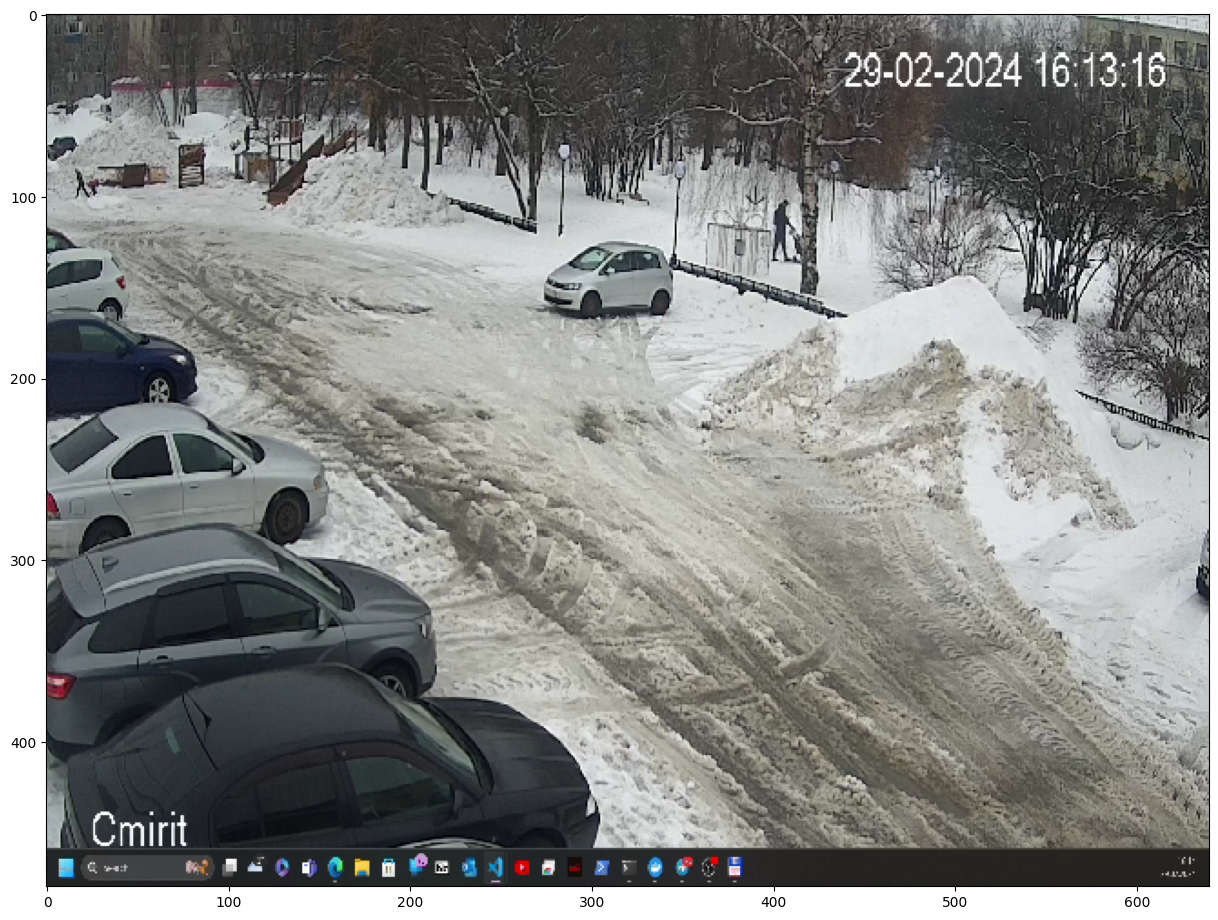

In [140]:
display_image(_frame)

In [137]:
cap.release()

In [1]:
import cv2
import mss

class ScreenCapture:
    def __init__(self, monitor_number=2):
        self.sct = mss.mss()
        self.monitor_number = monitor_number
        self.mon = self.sct.monitors[self.monitor_number]
        self.monitor = {
            "top": self.mon["top"],
            "left": self.mon["left"],
            "width": self.mon["width"],
            "height": self.mon["height"],
            "mon": self.monitor_number,
        }
        self.img = None
        
    def capture(self):
        self.img = np.array(self.sct.grab(self.monitor))
        return self.img